#  Clustering
#  Step 1: Import Libraries

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score, silhouette_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

import warnings 
warnings.filterwarnings("ignore")

# Step 2: Load and Merge Data

In [9]:
customers = pd.read_csv("P:\\Downloads\\Customers.csv")
transactions = pd.read_csv("P:\\Downloads\\Transactions.csv")

#  Aggregate transaction data

In [12]:
transaction_agg = transactions.groupby('CustomerID').agg({
    'TotalValue': 'sum',
    'Quantity': 'sum',
    'TransactionID': 'count'
}).reset_index()

#  Merge with customer data

In [17]:
data = pd.merge(customers, transaction_agg, on='CustomerID', how='left')

#  Fill missing values

In [20]:
data.fillna(0, inplace=True)

#  Step 3: Feature Engineering

In [23]:
data['AvgTransactionValue'] = data['TotalValue'] / data['TransactionID']
data['AvgTransactionValue'].fillna(0, inplace=True)

#  Encode categorical features (Region)

In [26]:
data = pd.get_dummies(data, columns=['Region'], drop_first=True)

#  Step 4: Normalize Features

In [29]:
features = ['TotalValue', 'Quantity', 'TransactionID', 'AvgTransactionValue']
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[features])

#  Step 5: Clustering
#  Determine optimal clusters using Elbow Method

In [32]:
inertia = []
for k in range(2, 11):  # Experimenting from 2 to 10 clusters
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=15, init='k-means++')  # Using k-means++ for better initialization
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)

#  Plot Elbow Curve

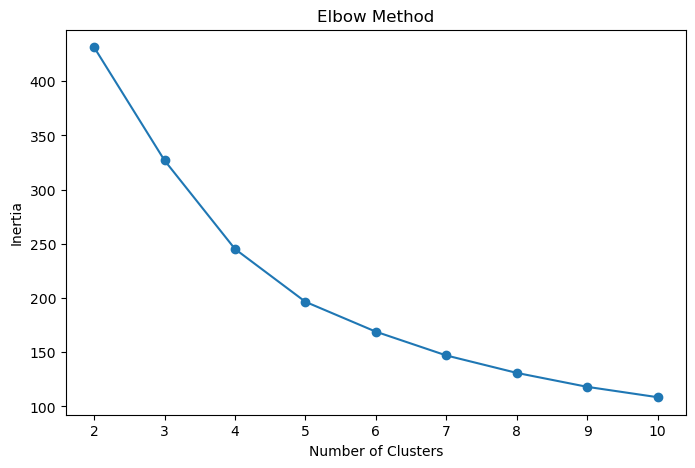

In [35]:
plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

Fit KMeans with optimal clusters

In [38]:
kmeans = KMeans(n_clusters=5, random_state=42, n_init=15, init='k-means++')
data['Cluster'] = kmeans.fit_predict(data_scaled)

#  Step 6: Evaluate Clustering

In [41]:
db_index = davies_bouldin_score(data_scaled, data['Cluster'])
silhouette = silhouette_score(data_scaled, data['Cluster'])

print(f"Davies-Bouldin Index: {db_index}")
print(f"Silhouette Score: {silhouette}")

Davies-Bouldin Index: 0.9037161528635445
Silhouette Score: 0.34425772238047814


#  Step 7: Visualize Clusters using PCA

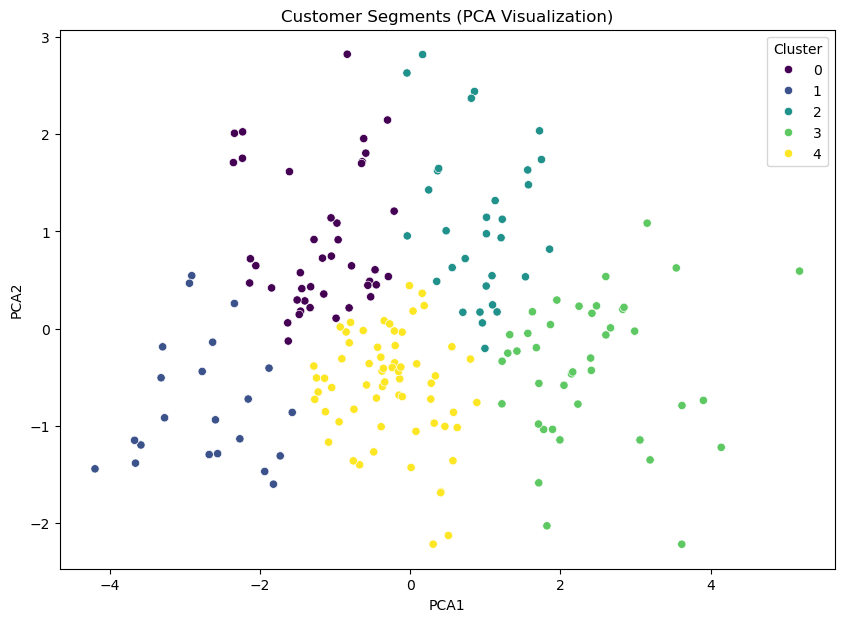

In [44]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(data_scaled)
data['PCA1'] = pca_result[:, 0]
data['PCA2'] = pca_result[:, 1]

plt.figure(figsize=(10, 7))
sns.scatterplot(data=data, x='PCA1', y='PCA2', hue='Cluster', palette='viridis')
plt.title('Customer Segments (PCA Visualization)')
plt.show()

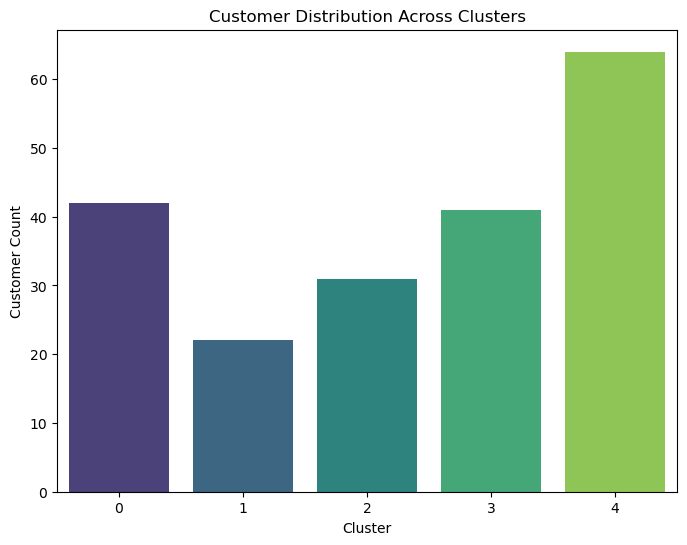

In [46]:
#The customer distribution across clusters
cluster_counts = data['Cluster'].value_counts().sort_index()
plt.figure(figsize=(8, 6))
sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette='viridis')
plt.xlabel('Cluster')
plt.ylabel('Customer Count')
plt.title('Customer Distribution Across Clusters')
plt.xticks(rotation=0)  # Set the x-axis labels to be horizontal for readability
plt.show()